# **Cosmic Classifier**

### This is the file for Team ChaturAI with following Teammates:

####   1. Ayush Saksena (cogni2047191)
####   2. Prince Raj (cogni2047190)
####   3. Tanishka Nibariya (cogni2047075)
####   4. Ratan Jyoti Jaiswal (cogni2047342)

## **Importing Necessary Libraries**

In [1]:
!pip install numpy==1.23.5 pandas==1.5.3

In [2]:
%%capture
!pip install catboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

## **Importing the Train Dataset**

### Upload Train dataset onto the Session Storage.
#### **Goto File on sidebar -> Upload File -> Upload Train dataset from Github Repository.**

In [3]:
dataset_path ='thermoracleTrain.csv'

try:
    df=pd.read_csv(dataset_path)
    print(df.shape)
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

(60000, 11)


In [4]:
df.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0
5,0.749979,1.064353,2.510823,0.105772,1.203825,1.355501,NaN,Category_10,Category_9,0.551453,2.0
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,Category_8,Category_7,1.876232,1.0
7,1.981474,-1.347445,-0.483752,-3.365811,2.690204,1.199946,-1.907013,Category_12,Category_5,0.443053,NaN
8,-3.306354,-0.316716,-0.431264,0.389815,-1.961216,-1.510182,0.538593,Category_8,Category_7,0.934055,1.0
9,-1.188687,1.775882,2.666702,0.434578,0.205058,NaN,-1.545261,Category_10,Category_9,-1.973059,4.0


In [5]:
df.describe()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Prediction
count,57016.000000,56968.000000,57016.000000,56923.000000,57079.000000,57003.000000,57055.000000,57058.000000,56961.000000
mean,-0.000202,-0.000288,-0.000469,0.001938,-0.000730,-0.001043,0.000188,0.000211,4.454381
std,2.263527,1.936598,1.804605,1.689267,1.605524,1.511685,1.316682,1.120303,2.890055
min,-4.364843,-5.503527,-5.553877,-5.816755,-5.077363,-4.801046,-4.537187,-4.007504,0.000000
25%,-1.555810,-1.426786,-1.279002,-1.218870,-1.078449,-1.048920,-0.937097,-0.709852,2.000000
50%,-0.188670,-0.330037,0.046231,-0.004676,0.040008,0.036651,-0.062001,0.049292,4.000000
75%,1.308113,1.503646,1.255432,1.063391,1.095483,1.058800,0.888149,0.789511,7.000000
max,9.324018,5.638094,6.030290,6.287045,5.584059,5.111014,4.942699,3.852567,9.000000


## **Preprocessing on Train Dataset**

### Label Encoding for Categorical Features

In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['Magnetic Field Strength', 'Radiation Levels']


In [7]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [8]:
df.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,20,16,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,19,19,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,20,18,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,20,2,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,16,1,0.407941,9.0
5,0.749979,1.064353,2.510823,0.105772,1.203825,1.355501,NaN,1,19,0.551453,2.0
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,18,17,1.876232,1.0
7,1.981474,-1.347445,-0.483752,-3.365811,2.690204,1.199946,-1.907013,3,15,0.443053,NaN
8,-3.306354,-0.316716,-0.431264,0.389815,-1.961216,-1.510182,0.538593,18,17,0.934055,1.0
9,-1.188687,1.775882,2.666702,0.434578,0.205058,NaN,-1.545261,1,19,-1.973059,4.0


### Imputing Missing Values using Median

In [9]:
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [10]:
df.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,-0.330037,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,20.0,16.0,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,19.0,19.0,0.049292,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,20.0,18.0,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,20.0,2.0,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,16.0,1.0,0.407941,9.0
5,0.749979,1.064353,2.510823,0.105772,1.203825,1.355501,-0.062001,1.0,19.0,0.551453,2.0
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,18.0,17.0,1.876232,1.0
7,1.981474,-1.347445,-0.483752,-3.365811,2.690204,1.199946,-1.907013,3.0,15.0,0.443053,4.0
8,-3.306354,-0.316716,-0.431264,0.389815,-1.961216,-1.510182,0.538593,18.0,17.0,0.934055,1.0
9,-1.188687,1.775882,2.666702,0.434578,0.205058,0.036651,-1.545261,1.0,19.0,-1.973059,4.0


In [11]:
df.isnull().sum()

,0
Atmospheric Density,0
Surface Temperature,0
Gravity,0
Water Content,0
Mineral Abundance,0
Orbital Period,0
Proximity to Star,0
Magnetic Field Strength,0
Radiation Levels,0
Atmospheric Composition Index,0


### Defining and Plotting Correlation Heatmap

In [12]:
corr = df.corr()
corr

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
Atmospheric Density,1.000000,0.000861,-0.000767,0.000595,0.001455,-0.000152,-0.000149,-0.081239,0.007219,-0.001235,-0.143477
Surface Temperature,0.000861,1.000000,-0.001460,0.002290,0.000435,-0.002079,-0.001186,-0.022285,0.063921,-0.001087,0.463785
Gravity,-0.000767,-0.001460,1.000000,-0.001027,0.001184,0.001515,0.001031,0.012494,-0.038837,-0.001669,-0.074558
Water Content,0.000595,0.002290,-0.001027,1.000000,0.000872,-0.000046,0.000439,-0.017895,-0.019885,0.000079,-0.148645
Mineral Abundance,0.001455,0.000435,0.001184,0.000872,1.000000,0.000467,0.000450,-0.033986,-0.016281,-0.000370,0.307891
Orbital Period,-0.000152,-0.002079,0.001515,-0.000046,0.000467,1.000000,0.000483,-0.026767,-0.050776,-0.000790,-0.058310
Proximity to Star,-0.000149,-0.001186,0.001031,0.000439,0.000450,0.000483,1.000000,0.044315,0.033018,0.000279,0.000096
Magnetic Field Strength,-0.081239,-0.022285,0.012494,-0.017895,-0.033986,-0.026767,0.044315,1.000000,0.037401,-0.015254,0.021923
Radiation Levels,0.007219,0.063921,-0.038837,-0.019885,-0.016281,-0.050776,0.033018,0.037401,1.000000,-0.013426,0.054408
Atmospheric Composition Index,-0.001235,-0.001087,-0.001669,0.000079,-0.000370,-0.000790,0.000279,-0.015254,-0.013426,1.000000,-0.079190


In [13]:
corr.describe()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.071192,0.136654,0.081628,0.074253,0.114738,0.078504,0.098071,0.083519,0.096069,0.080667,0.122175
std,0.311688,0.318477,0.305604,0.310189,0.308449,0.306416,0.299543,0.306070,0.302158,0.305796,0.347427
min,-0.143477,-0.022285,-0.074558,-0.148645,-0.033986,-0.058310,-0.001186,-0.081239,-0.050776,-0.079190,-0.148645
25%,-0.001001,-0.001323,-0.001564,-0.009461,0.000032,-0.014423,0.000188,-0.024526,-0.018083,-0.007548,-0.076874
50%,-0.000149,0.000435,-0.000767,0.000079,0.000467,-0.000152,0.000450,-0.015254,0.007219,-0.001087,0.000096
75%,0.001158,0.033106,0.001349,0.000733,0.001320,0.000475,0.017025,0.029662,0.045904,-0.000145,0.181150
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


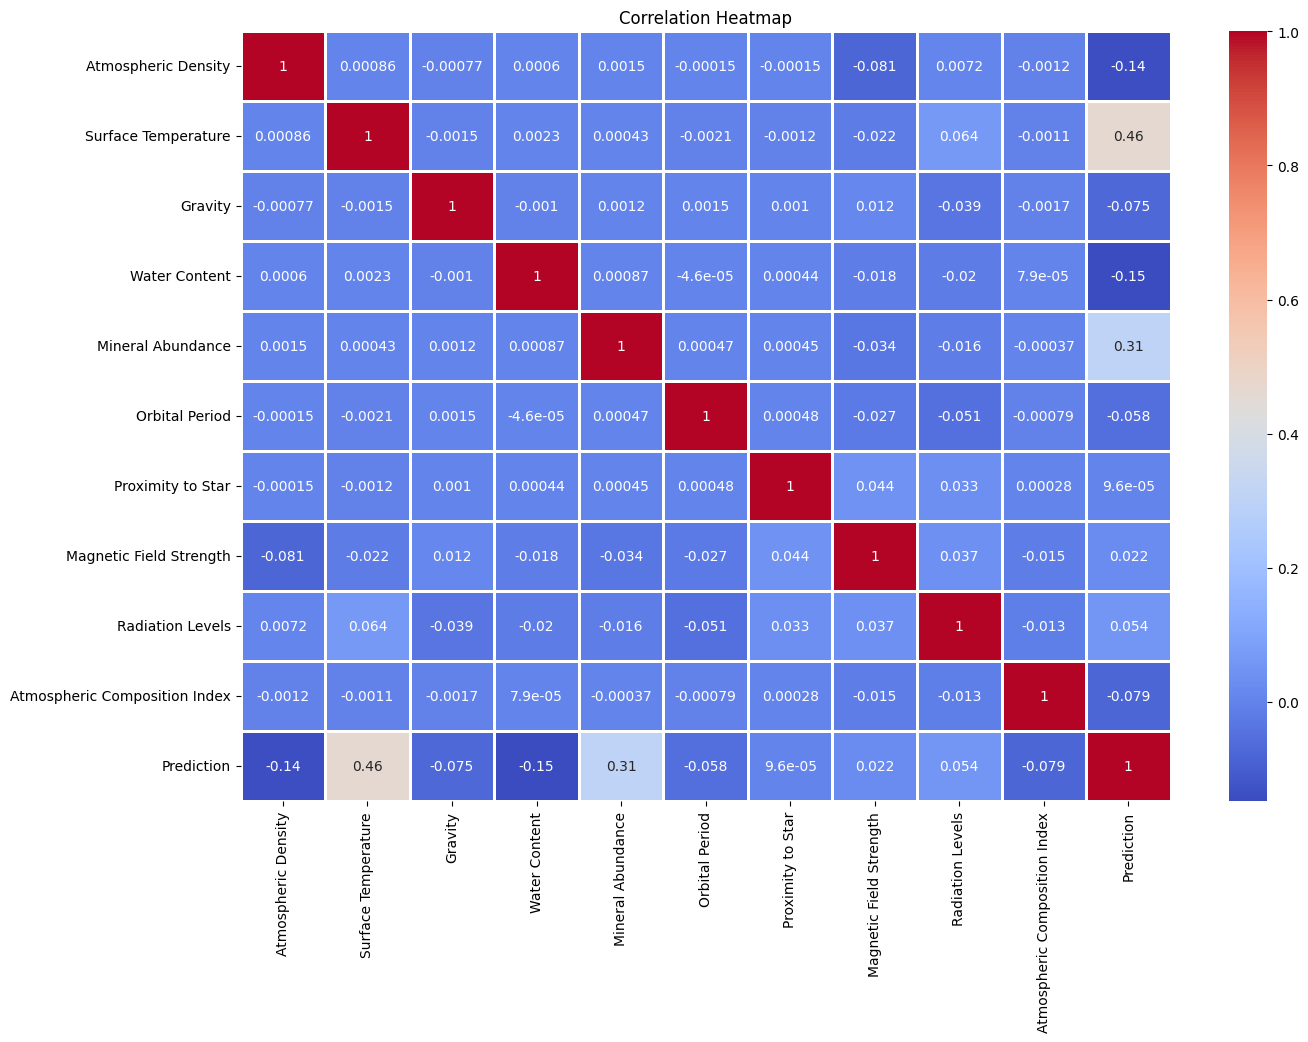

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()

### Scaling Using RobustScaler

In [15]:
scaler = RobustScaler()
numerical_cols = df.select_dtypes(include=np.number).columns.drop('Prediction')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
df.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.246055,0.000000,-0.151706,-0.972085,-0.093840,-0.466435,0.559890,0.266667,-0.066667,0.458434,5.0
1,1.625110,-0.301551,1.004647,-0.741983,-1.576308,-0.326745,-0.080207,0.200000,0.133333,0.000000,0.0
2,0.022193,0.711216,-0.350497,0.972667,-0.709776,-0.066657,-2.002215,0.266667,0.066667,-0.517452,4.0
3,-1.091137,-0.717831,0.432179,0.167033,-0.113529,1.456711,-1.111700,0.266667,-1.000000,0.042834,1.0
4,-0.472694,1.173550,0.043192,-0.372939,0.222075,0.004177,-0.219272,0.000000,-1.066667,0.255459,9.0
5,0.349158,0.508146,1.038294,0.051504,0.568199,0.666981,0.000000,-1.000000,0.133333,0.357679,2.0
6,-1.035208,-0.115964,-0.405313,0.121325,-0.281787,-1.066534,0.824916,0.133333,0.000000,1.301292,1.0
7,0.807248,-0.370766,-0.223274,-1.567337,1.293879,0.588312,-1.073689,-0.866667,-0.133333,0.280468,4.0
8,-1.159712,0.004854,-0.201161,0.183956,-0.977037,-0.782279,0.349511,0.133333,0.000000,0.630199,1.0
9,-0.371985,0.767443,1.103963,0.204830,0.080581,0.000000,-0.863171,-1.000000,0.133333,-1.440479,4.0


## **Classification Model Training**

### Separating features (X) and target (Y)



In [17]:
X = df.drop('Prediction', axis=1)
Y = df['Prediction']

In [18]:
X.head(5)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,0.246055,0.000000,-0.151706,-0.972085,-0.093840,-0.466435,0.559890,0.266667,-0.066667,0.458434
1,1.625110,-0.301551,1.004647,-0.741983,-1.576308,-0.326745,-0.080207,0.200000,0.133333,0.000000
2,0.022193,0.711216,-0.350497,0.972667,-0.709776,-0.066657,-2.002215,0.266667,0.066667,-0.517452
3,-1.091137,-0.717831,0.432179,0.167033,-0.113529,1.456711,-1.111700,0.266667,-1.000000,0.042834
4,-0.472694,1.173550,0.043192,-0.372939,0.222075,0.004177,-0.219272,0.000000,-1.066667,0.255459


In [19]:
Y.head(5)

,Prediction
0,5.0
1,0.0
2,4.0
3,1.0
4,9.0


### Splitting data into training and testing sets

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(48000, 10)
(12000, 10)


In [21]:
X_train.head(5)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
48572,0.372725,-0.126644,-0.926431,-1.061209,-0.467045,-0.379658,-1.050201,0.133333,0.066667,0.427362
38696,0.816521,0.097744,0.386863,-0.082170,-1.994494,-0.353420,0.218529,0.200000,-1.066667,0.477531
13611,-1.253373,-0.886945,0.501796,0.064914,-0.099603,0.658225,0.772190,0.200000,-1.000000,0.002680
35213,-0.285978,-0.531693,0.862477,0.440252,0.022768,-0.737665,-0.277032,-0.800000,-1.000000,0.792696
31766,-1.336804,-0.479994,-0.155457,0.218002,-0.984756,-0.119051,0.487474,0.133333,0.133333,0.102864


In [22]:
Y_train.head(5)

,Prediction
48572,5.0
38696,0.0
13611,1.0
35213,6.0
31766,1.0


In [23]:
X_test.head(5)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
12628,-0.118886,0.881378,-0.795517,0.028420,-0.860475,-0.517321,-0.263217,-0.600000,0.066667,0.267940
37730,0.579595,-1.053203,-1.095555,-0.653889,0.742051,-0.815219,0.103398,0.266667,0.133333,-1.639872
39991,-0.033771,-0.279511,0.521360,-1.864540,0.983082,0.286399,0.000000,0.066667,0.133333,1.098709
8525,-0.598826,1.090285,0.000000,-1.161896,1.074420,-0.118858,0.826774,-0.066667,-0.933333,-0.772547
8279,1.049884,-1.008304,0.164715,-0.654525,0.914682,0.766975,-0.636105,-0.666667,-0.200000,-0.793086


In [24]:
Y_test.head(5)

,Prediction
12628,7.0
37730,3.0
39991,8.0
8525,9.0
8279,3.0


### Classification Model : Cat Boost Classifier

In [25]:
cat_model = CatBoostClassifier(random_state=42, verbose=0, iterations=2000, learning_rate=0.05, depth=8)
cat_model.fit(X_train, Y_train)
cat_pred = cat_model.predict(X_test)

In [26]:
print(type(cat_pred))

<class 'numpy.ndarray'>


In [27]:
cat_pred[:10]

array([[7.],
       [3.],
       [8.],
       [9.],
       [3.],
       [9.],
       [7.],
       [7.],
       [5.],
       [4.]])

In [28]:
print(type(Y_test))

<class 'pandas.core.series.Series'>


In [29]:
Y_test[:10]

,Prediction
12628,7.0
37730,3.0
39991,8.0
8525,9.0
8279,3.0
51012,9.0
14871,7.0
15127,7.0
9366,5.0
33322,4.0


In [30]:
cat_pred = cat_pred.astype(int)
print(type(cat_pred))
cat_pred[:10]

<class 'numpy.ndarray'>


array([[7],
       [3],
       [8],
       [9],
       [3],
       [9],
       [7],
       [7],
       [5],
       [4]])

In [31]:
Y_test = Y_test.astype(int)
print(type(Y_test))
Y_test[:10]

<class 'pandas.core.series.Series'>


,Prediction
12628,7
37730,3
39991,8
8525,9
8279,3
51012,9
14871,7
15127,7
9366,5
33322,4


### Calculating Accuracy

In [32]:
cat_accuracy = accuracy_score(Y_test, cat_pred)
print(f"CatBoost Accuracy: {cat_accuracy}")

CatBoost Accuracy: 0.8575


# **Predictions on Test Dataset**

## **Importing the Test Dataset**

### Upload Test dataset onto the Session Storage.
#### **Goto File on sidebar -> Upload File -> Upload Test dataset from Github Repository.**

In [33]:
dataset_path ='cosmictest.csv'

try:
    df_test =pd.read_csv(dataset_path)
    print(df_test.shape)
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

(10000, 10)


In [34]:
df_test.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,Category_13,Category_6,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,Category_11,Category_10,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,Category_9,Category_9,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,Category_10,Category_9,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,Category_11,Category_6,0.763087
5,-4.005017,-1.901338,0.313775,0.236597,-1.253217,1.025298,0.383182,Category_8,Category_11,-0.285908
6,-0.998918,2.164810,-1.820124,-0.171959,-0.349017,0.718816,-0.668592,Category_11,Category_7,-1.706544
7,-1.247482,1.361764,-1.528481,0.861215,0.403036,-1.490710,-1.216129,Category_8,Category_12,-0.020934
8,1.028718,0.557269,1.025249,1.478554,-0.209783,0.016791,-0.147730,Category_7,Category_8,3.662600
9,-0.121597,3.281717,2.107816,-1.842053,-0.033432,1.113834,0.962910,Category_8,Category_11,-2.719543


In [35]:
df_test.describe()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.074543,0.028896,-0.081860,0.008577,0.097151,-0.026615,0.088995,0.042756
std,2.297061,1.992407,1.782432,1.704504,1.624317,1.502305,1.321652,1.090323
min,-4.227332,-5.604589,-5.197671,-5.592158,-4.750432,-4.535788,-3.653717,-3.828120
25%,-1.491899,-1.443051,-1.341715,-1.201182,-0.998779,-1.077409,-0.855691,-0.660108
50%,-0.131723,-0.260230,-0.055050,0.019245,0.132959,-0.010214,0.035565,0.072536
75%,1.414674,1.595845,1.161693,1.055115,1.210311,1.010315,0.992252,0.811699
max,9.354729,5.070067,5.201851,6.043354,5.296787,4.670274,4.815247,3.662600


## **Preprocessing on Test Dataset**

### Label Encoding for Categorical Features

In [36]:
categorical_cols = df_test.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['Magnetic Field Strength', 'Radiation Levels']


In [37]:
le = LabelEncoder()
for col in categorical_cols:
    df_test[col] = le.fit_transform(df_test[col])

In [38]:
df_test.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,5,14,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,3,1,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,19,17,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,2,17,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,3,14,0.763087
5,-4.005017,-1.901338,0.313775,0.236597,-1.253217,1.025298,0.383182,18,2,-0.285908
6,-0.998918,2.164810,-1.820124,-0.171959,-0.349017,0.718816,-0.668592,3,15,-1.706544
7,-1.247482,1.361764,-1.528481,0.861215,0.403036,-1.490710,-1.216129,18,3,-0.020934
8,1.028718,0.557269,1.025249,1.478554,-0.209783,0.016791,-0.147730,17,16,3.662600
9,-0.121597,3.281717,2.107816,-1.842053,-0.033432,1.113834,0.962910,18,2,-2.719543


### Imputing Missing Values using Median

In [39]:
imputer = SimpleImputer(strategy='median')
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)

In [40]:
df_test.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,5.0,14.0,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,3.0,1.0,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,19.0,17.0,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,2.0,17.0,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,3.0,14.0,0.763087
5,-4.005017,-1.901338,0.313775,0.236597,-1.253217,1.025298,0.383182,18.0,2.0,-0.285908
6,-0.998918,2.164810,-1.820124,-0.171959,-0.349017,0.718816,-0.668592,3.0,15.0,-1.706544
7,-1.247482,1.361764,-1.528481,0.861215,0.403036,-1.490710,-1.216129,18.0,3.0,-0.020934
8,1.028718,0.557269,1.025249,1.478554,-0.209783,0.016791,-0.147730,17.0,16.0,3.662600
9,-0.121597,3.281717,2.107816,-1.842053,-0.033432,1.113834,0.962910,18.0,2.0,-2.719543


In [41]:
df_test.isnull().sum()

,0
Atmospheric Density,0
Surface Temperature,0
Gravity,0
Water Content,0
Mineral Abundance,0
Orbital Period,0
Proximity to Star,0
Magnetic Field Strength,0
Radiation Levels,0
Atmospheric Composition Index,0


### Scaling Using RobustScaler

In [42]:
scaler = RobustScaler()
numerical_cols = df_test.select_dtypes(include=np.number).columns
df_test[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])

In [43]:
df_test.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-0.403001,1.050635,-0.045136,-0.549349,-0.939582,0.460160,0.814537,-0.714286,0.000000,-0.545143
1,0.073230,-1.147509,-0.217243,0.684415,-0.150701,-0.878810,0.573494,-0.857143,-1.000000,-0.281550
2,-1.231082,-0.470354,0.125648,0.443559,-1.008345,0.169972,-0.070236,0.285714,0.230769,-0.411192
3,1.710099,0.231380,0.419573,-0.179284,-0.430505,-0.907105,1.456880,-0.928571,0.230769,-0.188947
4,0.300677,1.007771,-0.435290,1.088773,-0.325436,0.426737,-1.070611,-0.857143,0.000000,0.469186
5,-1.332598,-0.540034,0.147329,0.096331,-0.627488,0.496001,0.188110,0.214286,-0.923077,-0.243541
6,-0.298356,0.798001,-0.705068,-0.084742,-0.218179,0.349198,-0.381049,-0.857143,0.076923,-1.208773
7,-0.383874,0.533744,-0.588570,0.373165,0.122257,-0.709144,-0.677344,0.214286,-0.846154,-0.063508
8,0.399247,0.269012,0.431531,0.646772,-0.155151,0.012935,-0.099188,0.142857,0.153846,2.439223
9,0.003484,1.165537,0.863969,-0.824935,-0.075321,0.538409,0.501826,0.214286,-0.923077,-1.897042


## **Implementing Model on Test Dataset**

In [44]:
test_pred = cat_model.predict(df_test)

In [45]:
print(type(test_pred))

<class 'numpy.ndarray'>


In [46]:
test_pred[:10]

array([[7.],
       [2.],
       [1.],
       [0.],
       [4.],
       [1.],
       [4.],
       [4.],
       [2.],
       [7.]])

In [47]:
test_pred = test_pred.astype(int)
test_pred[:10]

array([[7],
       [2],
       [1],
       [0],
       [4],
       [1],
       [4],
       [4],
       [2],
       [7]])

# **Creating Submissions.csv file**

### Creating a dataframe of predictions with the column Planet_ID

In [48]:
pred_df = pd.DataFrame(test_pred, columns=['Planet_ID'])

### Creating mapping Dictionary

In [49]:
class_dict = {
    0: "Bewohnbar", 1: "Terraformierbar", 2: "Rohstoffreich", 3: "Wissenschaftlich", 4: "Gasriese",
    5: "Wüstenplanet", 6: "Eiswelt", 7: "Toxischetmosäre", 8: "Hohestrahlung", 9: "Toterahswelt"
}

### Mapping Planet_ID to Predcited_Class

In [50]:
pred_df['Predicted_Class'] = pred_df['Planet_ID'].map(class_dict)

### Converting dataframe to csv

In [51]:
pred_df.to_csv("Submissions.csv", index=False)

### Downloading the csv file

In [52]:
from google.colab import files

files.download("Submissions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>